In [ ]:
!unzip /content/testBL3_7-20230714T123218Z-001.zip

In [27]:
import librosa
import warnings
import numpy as np
import pandas as pd
import os
warnings.filterwarnings("ignore")

emotion_arr = []
sad_arr = []
labels = []

"""
for x in os.listdir("/content/test_BL/neutral"):
  file_name = "/content/test_BL/neutral/"+str(x)
  y, sr = librosa.load(file_name)
  y = librosa.effects.harmonic(y)
  tonnetz = np.median(librosa.feature.tonnetz(y=y,sr=sr))
  emotion_arr.append(tonnetz)
  labels.append("neural")"""
emotion_list = ["sad", "neutral", "happy", "disgust", "fear", "angry", "surprise"]
#emotion_list = ["surprise", "happy"]
#emotion_list = ["sad", "neutral", "happy", "disgust", "fear", "angry"]
for emotion in emotion_list:
  emotion_str = "/content/testBL3_7/" + emotion
  print(emotion)
  for x in os.listdir(emotion_str):
    file_name = emotion_str+"/"+str(x)
    y, sr = librosa.load(file_name)
    mel = np.median(librosa.feature.melspectrogram(y=y,sr=sr))
    #y = librosa.effects.harmonic(y)
    #tonnetz = np.median(librosa.feature.tonnetz(y=y,sr=sr))
    #emotion_arr.append(tonnetz)
    emotion_arr.append(mel)
    labels.append(emotion)


sad
neutral
happy
disgust
fear
angry
surprise


In [ ]:
"""emotion_arr_happy = []
for x in os.listdir("/content/test_BL/angry"):
  file_name = "/content/test_BL/angry/"+str(x)
  y, sr = librosa.load(file_name)
  y = librosa.effects.harmonic(y)
  tonnetz = np.median(librosa.feature.tonnetz(y=y,sr=sr))
  emotion_arr_happy.append(tonnetz)
print(emotion_arr_happy)"""

[-0.00411489937687296, 0.00033768688654974553, -0.006314455647952992, 0.003024668941242722, -0.006338342209346795, 0.0043576088850668816, 0.0005079313366187791, -0.0023112278855290935, -0.013843490364734281, 0.0027693279620399154, 0.011499566782731254, -0.0072196756882285575, 0.0008747094883217562, 0.005031564846554111, -0.002752862793147912, -0.0008692152112108929, -0.005880168352664231, 0.00014263300402117372, -0.02640935769878873, -0.009466759394699167]


In [28]:
labeled_df = pd.DataFrame(columns = ["labels", "emotion"])
labeled_df["labels"] = labels
labeled_df["emotion"] = emotion_arr

labeled_df=labeled_df.sample(frac = 1)

emotion_train = np.array(labeled_df["emotion"][:1280])
emotion_val = np.array(labeled_df["emotion"][1280:1440])
emotion_test = np.array(labeled_df["emotion"][1440:1600])
labels_train = np.array(labeled_df["labels"][:1280])
labels_val = np.array(labeled_df["labels"][1280:1440])
labels_test = np.array(labeled_df["labels"][1440:1600])

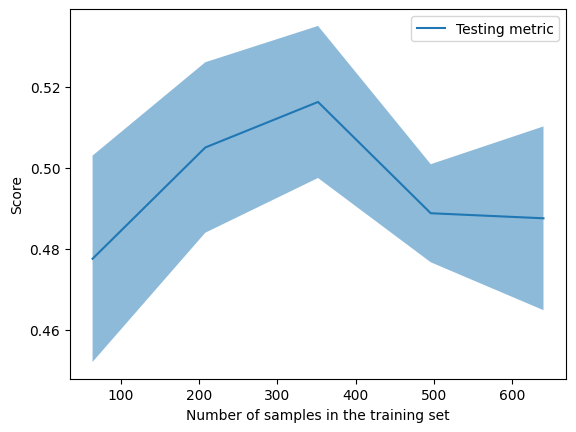

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
SVM_model = SVC().fit(emotion_train.reshape(-1,1), labels_train)#can it be svc() only

train_sizes, train_scores, test_scores = learning_curve(SVC(), np.array(labeled_df["emotion"]).reshape(-1,1), labeled_df["labels"])


display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()


In [29]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
SVM_model = SVC().fit(emotion_train.reshape(-1,1), labels_train)
model_predict = SVM_model.predict(emotion_train.reshape(-1,1))
print(accuracy_score(y_true=labels_train,y_pred=model_predict))
model_predict = SVM_model.predict(emotion_test.reshape(-1,1))
print(model_predict)
print(accuracy_score(y_true=labels_test,y_pred=model_predict))

0.290625
['happy' 'disgust' 'neutral' 'neutral' 'surprise' 'disgust' 'disgust'
 'fear' 'disgust' 'angry' 'neutral' 'fear' 'neutral' 'neutral' 'fear'
 'disgust' 'disgust' 'disgust' 'neutral' 'neutral' 'neutral' 'disgust'
 'happy' 'neutral' 'neutral' 'happy' 'disgust' 'disgust' 'happy' 'disgust'
 'disgust' 'neutral' 'neutral' 'neutral' 'disgust' 'surprise' 'surprise'
 'happy' 'disgust' 'neutral' 'neutral' 'disgust' 'neutral' 'disgust'
 'neutral' 'angry' 'disgust' 'angry' 'angry' 'disgust' 'disgust' 'neutral'
 'happy' 'surprise' 'disgust' 'surprise' 'neutral' 'neutral' 'disgust'
 'disgust' 'disgust' 'disgust' 'neutral' 'disgust' 'disgust' 'disgust'
 'neutral' 'neutral' 'surprise' 'disgust' 'neutral' 'disgust' 'happy'
 'happy' 'surprise' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust'
 'happy' 'disgust' 'disgust' 'neutral' 'disgust' 'happy' 'happy'
 'surprise' 'surprise' 'fear' 'disgust' 'happy' 'disgust' 'disgust' 'fear'
 'disgust' 'surprise' 'neutral' 'surprise' 'surprise' 'neutral' 'n

0.325 when using tonnetz